# What is a Top-Rated Wine on Amazon Web Services

The Wine Quality Data Set along with additional information about can be found on the <a href='https://archive.ics.uci.edu/ml/datasets/wine+quality' target='_blank'>UCI Machine Learning Repository</a>


**Load red and white wine quality data sets**

Note: you can install the requirements file for this notebook if you want to install all the libraries at once. Open a new terminal window, navigate to the folder with the "requirements_jupyter.txt" and run the following command:

***pip3 install -r requirements_jupyter.txt***


In [1]:
# !pip3 install -r requirements_jupyter.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Source:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\hp\AppData\Local\Temp\ipykernel_36560\3157026884.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# if you cannot download the files try doing it manually
# if have an ssl error  Mac try fix: "/Applications/Python\ 3.6/Install\ Certificates.command"

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                  sep=";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                    sep=";")

In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Merge both data sets together**

In [6]:
# create a new wine color feature
white['color'] = 0
red['color'] = 1

# concat both data sets together
wine_df = pd.concat([white, red], ignore_index=True)


**Explore the Data**

In [7]:
# feature data types
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [9]:
# what about our outcome column?
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

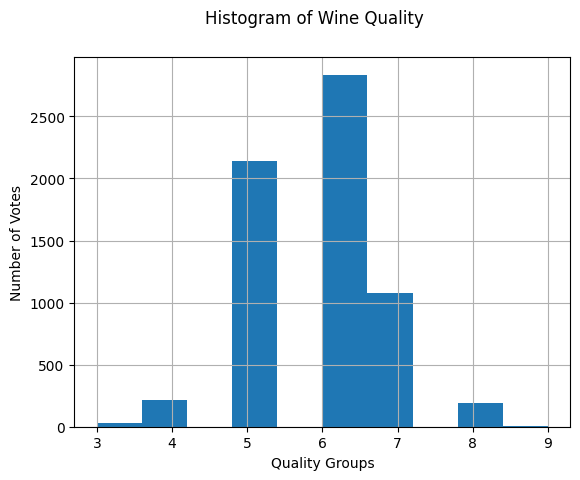

In [10]:
wine_df['quality'].hist()
plt.suptitle('Histogram of Wine Quality')
plt.xlabel('Quality Groups')
plt.ylabel('Number of Votes')
plt.show()

**What can we do to classify this data with such imbalannced edges?**

In [11]:

# try balancing the data somewhat by limiting each category to 500 samples
wine_quality_scale = set(wine_df['quality'])

temp_df = []
for quality in wine_quality_scale:
    wine_df_tmp = wine_df[wine_df['quality']==quality]
    # sample down any categories with ovrer 500 entries
    if (len(wine_df_tmp) > 500):
        wine_df_tmp = wine_df_tmp.sample(500, replace=False)
    temp_df.append(wine_df_tmp)    
len(temp_df)     

wine_balanced_df = pd.concat(temp_df)

print(wine_balanced_df['quality'].value_counts())

quality
5    500
6    500
7    500
4    216
8    193
3     30
9      5
Name: count, dtype: int64


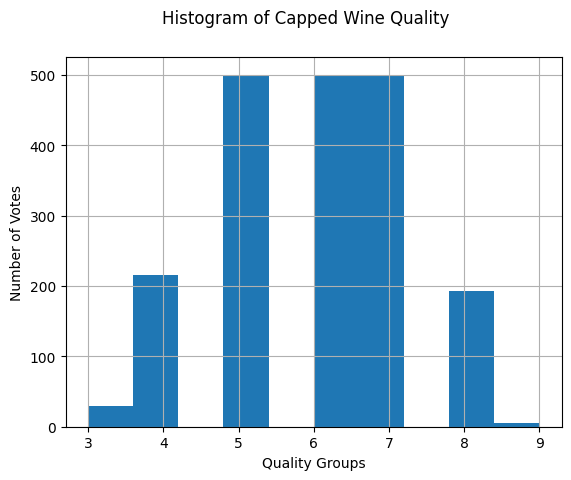

In [12]:
wine_balanced_df['quality'].hist()
plt.suptitle('Histogram of Capped Wine Quality')
plt.xlabel('Quality Groups')
plt.ylabel('Number of Votes')
plt.show()

**The edges still are imbalanced, so a better way would be re-balance the groupings:**

<TABLE>
<TR><TD>Old Quality</TD><TD>New Quality</TD></TR>
<TR><TD>3,4,5</TD><TD>3</TD></TR>
<TR><TD>6</TD><TD>6</TD></TR>
<TR><TD>7,8,9</TD><TD>9</TD></TR>
</TABLE>

In [13]:
# balance categories more equally
wine_df_bad = wine_df[wine_df['quality'].isin([3,4,5])]
wine_df_bad['quality'] = 3
wind_df_average = wine_df[wine_df['quality']==6]
wind_df_average['quality'] = 6
wind_df_good = wine_df[wine_df['quality'].isin([7,8,9])]
wind_df_good['quality'] = 9
wine_df = pd.concat([wine_df_bad,wind_df_average,wind_df_good], ignore_index=True)

# save a copy to file for our web application
wine_df.to_csv('wine_df.csv', index=False)

print(wine_df['quality'].value_counts())

quality
6    2836
3    2384
9    1277
Name: count, dtype: int64


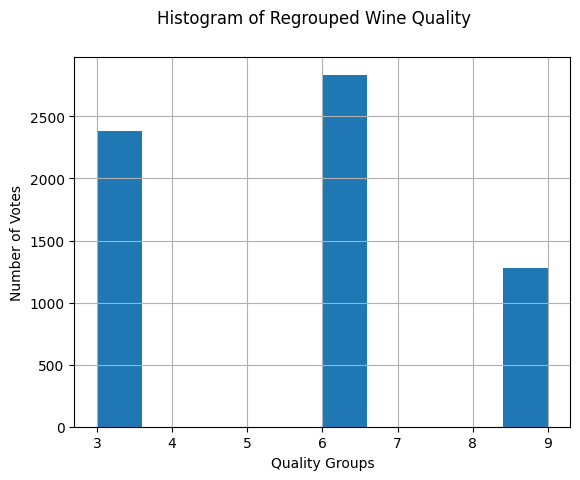

In [14]:

wine_df['quality'].hist()
plt.suptitle('Histogram of Regrouped Wine Quality')
plt.xlabel('Quality Groups')
plt.ylabel('Number of Votes')
plt.show()

In [15]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,3,0
1,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,3,0
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,3,0
3,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,3,0
4,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,3,0


In [16]:
# !pip install scipy

In [17]:


features = [ft for ft in list(wine_df) if ft not in ['quality']]
from sklearn.model_selection import train_test_split
wine_df['quality'] = pd.Categorical(wine_df['quality'])
wine_df['quality_class'] = wine_df['quality'].cat.codes
outcome = 'quality_class'
outcome_buckets = len(set(wine_df['quality_class']))
print(set(wine_df['quality_class']))
X_train, X_test, y_train, y_test = train_test_split(wine_df[features],
                        wine_df[outcome], test_size=0.2, random_state=1)
print(("len(X_train): %i, len(X_test): %i, len(y_train): %i, len(y_test): %i") % (len(X_train),
                                                                               len(X_test),
                                                                               len(y_train),
                                                                               len(y_test)))

{0, 1, 2}
len(X_train): 5197, len(X_test): 1300, len(y_train): 5197, len(y_test): 1300


**Modeling Time**

In [33]:
# pip install scikit-learn
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
gbm_model = GradientBoostingClassifier(random_state=10, learning_rate=0.1, max_depth=10)
gbm_model.fit(X_train[features], y_train)

# save the model so we don't have to train it in the web application
#gbm_model_dump = pickle.dumps(gbm_model)
#gbm_model = pickle.loads(gbm_model_dump)

with open('gbm_model_dump.p', 'wb') as f:
    pickle.dump(gbm_model, f, 2)
                
gbm_model = pickle.load(open("gbm_model_dump.p", "rb" ))
 
preds = gbm_model.predict_proba(X_test)
preds

array([[6.16080141e-01, 3.63726705e-01, 2.01931540e-02],
       [1.50300373e-03, 3.04077879e-02, 9.68089208e-01],
       [6.61682473e-01, 3.34429577e-01, 3.88794962e-03],
       ...,
       [2.08906663e-01, 7.85147445e-01, 5.94589212e-03],
       [9.62396668e-01, 3.67858727e-02, 8.17459450e-04],
       [9.75687308e-01, 2.33838191e-02, 9.28873295e-04]])

In [19]:
print(preds.shape)
preds[0]

(1300, 3)


array([0.61608014, 0.36372671, 0.02019315])

In [20]:
list(wine_df['quality'].cat.categories)

[3, 6, 9]

In [21]:
print('Argmax: %i' % np.argmax(preds[0]))
print('Quality class: %i' % list(wine_df['quality'].cat.categories)[np.argmax(preds[0])])

Argmax: 0
Quality class: 3


In [22]:
# get highest probability for each quality classes
from sklearn.metrics import precision_score
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Precision_score: %0.2f" % precision_score(y_test, best_preds, average='macro'))


Precision_score: 0.74


In [23]:
set(wine_df['quality'])

{3, 6, 9}

Confusion matrix, without normalization
[[354 103   7]
 [ 99 444  46]
 [  7  80 160]]


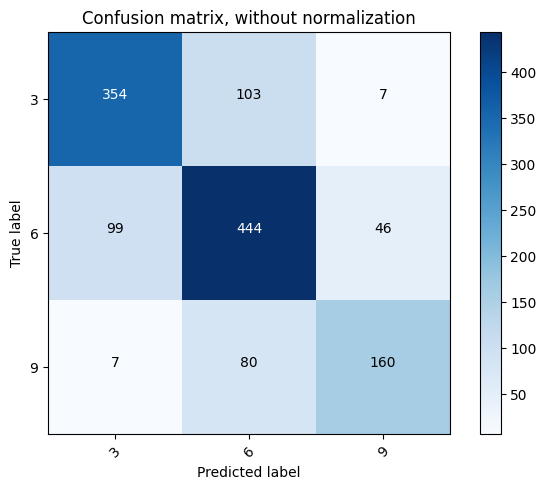

In [24]:

# confusion matrix
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, best_preds)

# Plot non-normalized confusion matrix
import matplotlib.pyplot as plt
plt.figure()
# use actual labels, not outcome code
plot_confusion_matrix(cnf_matrix, classes=list(wine_df['quality'].cat.categories),
                      title='Confusion matrix, without normalization')
 
plt.show()


<H2>Test predicting wine using new data</H2>

Get means, min, and max of all quantitative features to populate web application

In [25]:

fixed_acidity = np.mean(wine_df['fixed acidity']) # 7.215307
print('fixed_acidity: %f' % fixed_acidity)
print(('fixed_acidity min: %f, max: %f') % (np.min(wine_df['fixed acidity']), np.max(wine_df['fixed acidity'])))
print('--')

volatile_acidity = np.mean(wine_df['volatile acidity'])
print('volatile_acidity: %f' % volatile_acidity)
print(('volatile_acidity min: %f, max: %f') % (np.min(wine_df['volatile acidity']), np.max(wine_df['volatile acidity'])))
print('--')

citric_acid = np.mean(wine_df['citric acid'])
print('citric_acid: %f' % citric_acid)
print(('citric_acid min: %f, max: %f') % (np.min(wine_df['citric acid']), np.max(wine_df['citric acid'])))
print('--')

residual_sugar = np.mean(wine_df['residual sugar'])
print('residual_sugar: %f' % residual_sugar)
print(('residual_sugar min: %f, max: %f') % (np.min(wine_df['residual sugar']), np.max(wine_df['residual sugar'])))
print('--')

chlorides = np.mean(wine_df['chlorides'])
print('chlorides: %f' % chlorides)
print(('chlorides min: %f, max: %f') % (np.min(wine_df['chlorides']), np.max(wine_df['chlorides'])))
print('--')

free_sulfur_dioxide = np.mean(wine_df['free sulfur dioxide'])
print('free sulfur dioxide: %f' % free_sulfur_dioxide)
print(('free sulfur dioxide: %f, max: %f') % (np.min(wine_df['free sulfur dioxide']), np.max(wine_df['free sulfur dioxide'])))
print('--')

total_sulfur_dioxide = np.mean(wine_df['total sulfur dioxide'])
print('total_sulfur_dioxide: %f' % total_sulfur_dioxide)
print(('total sulfur dioxide: %f, max: %f') % (np.min(wine_df['total sulfur dioxide']), np.max(wine_df['total sulfur dioxide'])))
print('--')

density = np.mean(wine_df['density'])
print('density: %f' % density)
print(('density: %f, max: %f') % (np.min(wine_df['density']), np.max(wine_df['density'])))
print('--')

pH = np.mean(wine_df['pH'])
print('pH: %f' % pH)
print(('pH: %f, max: %f') % (np.min(wine_df['pH']), np.max(wine_df['pH'])))
print('--')

sulphates = np.mean(wine_df['sulphates'])
print('sulphates: %f' % sulphates)
print(('sulphates: %f, max: %f') % (np.min(wine_df['sulphates']), np.max(wine_df['sulphates'])))
print('--')

alcohol = np.mean(wine_df['alcohol'])
print('alcohol: %f' % alcohol)
print(('alcohol: %f, max: %f') % (np.min(wine_df['alcohol']), np.max(wine_df['alcohol'])))
print('--')

color = np.mean(wine_df['color'])
print('color: %i' % round(color))
print(('color: %f, max: %f') % (np.min(wine_df['color']), np.max(wine_df['color'])))
print('--')

color = 0

fixed_acidity: 7.215307
fixed_acidity min: 3.800000, max: 15.900000
--
volatile_acidity: 0.339666
volatile_acidity min: 0.080000, max: 1.580000
--
citric_acid: 0.318633
citric_acid min: 0.000000, max: 1.660000
--
residual_sugar: 5.443235
residual_sugar min: 0.600000, max: 65.800000
--
chlorides: 0.056034
chlorides min: 0.009000, max: 0.611000
--
free sulfur dioxide: 30.525319
free sulfur dioxide: 1.000000, max: 289.000000
--
total_sulfur_dioxide: 115.744574
total sulfur dioxide: 6.000000, max: 440.000000
--
density: 0.994697
density: 0.987110, max: 1.038980
--
pH: 3.218501
pH: 2.720000, max: 4.010000
--
sulphates: 0.531268
sulphates: 0.220000, max: 2.000000
--
alcohol: 10.491801
alcohol: 8.000000, max: 14.900000
--
color: 0
color: 0.000000, max: 1.000000
--


In [26]:
# test predicting wine entry from new data
# default wine constants based on data mean values
 
# create data set of new data
x_test_tmp = pd.DataFrame([[fixed_acidity,
                                 volatile_acidity,
                                 citric_acid,
                                 residual_sugar,
                                 chlorides,
                                 free_sulfur_dioxide,
                                 total_sulfur_dioxide,
                                 density,
                                 pH,
                                 sulphates,
                                 alcohol,
                                 color]], columns = X_test.columns.values)

# predict quality based on incoming values
preds = gbm_model.predict_proba((x_test_tmp))

In [27]:
list(wine_df['quality'].cat.categories)[np.argmax(preds)]

6

In [28]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'color']

In [29]:
# get best quality prediction from original quality scale
print(('Predicted wine quality: %i') % list(wine_df['quality'].cat.categories)[np.argmax(preds)])
# get mean quality to compare
print(('Actual mean wine quality: %0.2f') % np.mean(wine_df['quality'].values))

Predicted wine quality: 6
Actual mean wine quality: 5.49


In [30]:
preds 

array([[0.39238324, 0.5813024 , 0.02631436]])

In [31]:
x_test_tmp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0
